Below cell contains starter code to generate the initial centers.
Please do not change anything apart from the student ID.
The initial centers will be in a dictionary with keys being 'k' and value being the centers.

In [16]:
from precode2 import * 

data = np.load('AllSamples.npy')
initial_centers = {}

for k in range(2, 11):
    centers = initial_S2("8606", k)  # please replace 0111 with your last four digit of your ID
    initial_centers[k] = centers 


# Function to apply k-means++ initialization
def custom_kmeans_init(init_center, k):
    centroids = [] # Choose the first centroid randomly
    centroids.append(init_center)

    for _ in range(1, k):
        distances = np.array([np.min(np.linalg.norm(x - c) for c in centroids) for x in data])
        unused_points = np.array([x for x in data if not any(np.all(x == c) for c in centroids)])

        if len(unused_points) > 0:
            avg_distances = [np.mean([np.linalg.norm(x - c) for c in centroids]) for x in unused_points]
            next_centroid_index = np.argmax(avg_distances)
            centroids.append(unused_points[next_centroid_index])
        else:
            # If all points are already used, break the loop
            break

    return np.array(centroids)

initial_centroids = {}
for k in range(2,11):
    initial_centroids[k] = custom_kmeans_init(initial_centers[k],k)


Print the last 4 digits of your student id as string in the cell
below. Please make sure to only have one print statement in the cell below.

In [17]:
### TEST FUNCTION: test_print_id
# DO NOT REMOVE THE LINE ABOVE
print('8606') #add your ID again here

8606


Add your code for computing the kMeans final centroids and loss functions in the code block below.

In [18]:
import numpy as np
import math

def min_dist(sample, centroids, k):
    """ compute minimum distance for sample to any point in centroids"""
    cluster = 0
    min_d = np.linalg.norm(sample-centroids[0],ord=2)
    #min_d = eculidean_dist(sample, centroids[0])
    for i in range(1,k):
        dist = np.linalg.norm(sample-centroids[i],ord=2)
        #dist = eculidean_dist(sample, centroids[i])
        if (dist <= min_d):
            min_d = dist
            cluster = i

    return cluster

def centroids_equal(centroid_old, centroid_new):
    if len(centroid_old) != len(centroid_new):
        return False

    for cen1, cen2 in zip(centroid_old, centroid_new):
        if cen1 != cen2:
            return False

    return True

def update_centroids(cluster_points,k,old_centroids):
    """Calculate new centroids given cluster_points"""
    new_centroids = []
    for i, cluster in enumerate(cluster_points):
        if cluster:
            new_centroids.append(np.mean(cluster,axis=0))
        else:
            new_centroids.append(old_centroids[i])
    return np.array(new_centroids)

def loss(clusters, centroids):
    """function to calculate the loss function given clusters and centroids"""
    total_loss = 0
    for k in range(len(clusters)):
        cluster_sq = np.square(clusters[k]-centroids[k])
        total_loss += np.sum(cluster_sq)
    return total_loss


final_centroids = {}
objectives = {}
labels = {}
converge_iteration = {}
def kMeans(data, init_centers, n_iter=200, min_err=0.00005):
    """Implement kMeans with init_centers and max iteration."""
    for k in range(2, 11):
        centroids = init_centers[k]  
        centroids_old = np.zeros(centroids.shape)
        #for _ in range(n_iter):
        iter = 0
        while(True):
            cluster_points = [[] for i in range(k)]
            label = []
            for sample in data:
                cluster_num = min_dist(sample, centroids, len(centroids))
                cluster_points[cluster_num].append(sample)
                label.append(cluster_num)
            centroids_old = centroids
            centroids = update_centroids(cluster_points, k, centroids_old)
            # Check for convergence based on the change in centroids
            #if np.linalg.norm(centroids - centroids_old, ord=2) < min_err:
            iter += 1
            if np.array_equal(centroids, centroids_old):
                break
        final_centroids[k] = centroids
        objectives[k] = loss(cluster_points, centroids)
        labels[k] = label
        converge_iteration[k] = iter
kMeans(data,initial_centroids)

Please use the following cell to print all the final 
centeriods for k in the range of 2 to 10, both inclusive.

Notes:
The centeriods should have the following format: 
[[x1,y1],[x2,y2],[x3,y3]][[x_1,y_1],[x_2,y_2],[x_3,y_3]]

The order of the centeriod does not matter 
but do NOT change the order for x and y coordinate.

Please print the centroids from k=2 to k=10 in order and each on a new line.
Do not print anything else in the code cell below.

Example:  
[[x1, y1], [x2, y2]]

[[x1, y1], [x2, y2], [x3, y3]]

 .

 .
 
 .

 [[x1,y1]..[x9,y9]]

In [19]:
### TEST FUNCTION: test_project2_part2_1cen
# DO NOT REMOVE THE LINE ABOVE
for k in range(2,11):
    cnt = len(final_centroids[k])
    print('[',end='')
    for it in range(0,cnt-1):
        print('[',end='')
        print(f'{final_centroids[k][it][0]},',end='')
        print(f'{final_centroids[k][it][1]}',end='')
        print('],',end='')
    print('[',end='')
    print(f'{final_centroids[k][cnt-1][0]},',end='')
    print(f'{final_centroids[k][cnt-1][1]}]',end='')
    print(']')

[[5.000562341588762,2.4854274751531933],[4.852611930287174,7.271641711202775]]
[[7.2397511895844495,2.4820826910731952],[4.830919584356354,7.299599586723327],[3.234890046359086,2.5530321964002036]]
[[6.783746087903545,2.8501999866465444],[7.104840584635475,8.054757077947892],[2.852351493110535,2.2818648297203246],[3.3049567440325536,6.899602240015593]]
[[3.6513088180811346,3.710290061475077],[6.909733017914778,7.760839303179277],[3.145061482959145,0.9077065486588153],[3.056387469330455,7.046004290524775],[7.414192434680615,2.3216911383868664]]
[[5.2305366674047375,4.279342496049099],[7.914309977818314,8.519909807700076],[7.556167822397726,2.235167959857534],[2.541652523310345,7.002678323536489],[2.681986334188929,2.094615867800809],[5.2402829638043125,7.531310293267821]]
[[2.536501078790139,6.859419784482168],[7.359489684877186,2.307518866185622],[7.914309977818314,8.519909807700076],[3.1690614508664035,0.8143251472991676],[4.859398750231154,7.941638208906054],[5.807305142663451,5.2924

Please use the following cell to print all the final loss functions for k in the range of 2 to 10, both inclusive.

Notes:
Print the loss functions for every value of k in a new line and in order.
Do not print anything else in the code cell below.

Example: 

L1 

L2 

L3 

.

.

.

L9

In [20]:
### TEST FUNCTION: test_project2_part2_loss
# DO NOT REMOVE THE LINE ABOVE
for k in range(2,11):
    print(objectives[k])

1921.0334858562062
1338.1076016520997
804.848957398564
655.6770203672841
462.9263558248374
399.70030157930466
404.12682136949945
310.39007978026746
228.19429530506133


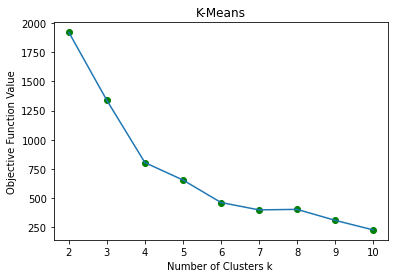

In [21]:
# plot showing # of clusters and their loss functions
import matplotlib.pyplot as plt 
def plot_graph(objectives=None):
    clusters = [x for x in range(2,11)]
    loss = []
    for cluster in clusters:
        loss.append(objectives[cluster])
    plt.plot(clusters, loss)
    plt.scatter(clusters,loss,color='green')
    plt.xlabel('Number of Clusters k ')
    plt.ylabel('Objective Function Value')
    plt.title('K-Means')
    plt.show()

plot_graph(objectives)

**This part of the project is manually graded.**

Please print your plots in the next few cells.


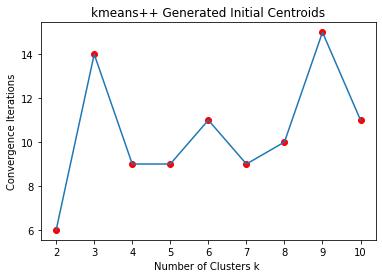

In [22]:
# plot showing # of clusters and convergence iterations 
import matplotlib.pyplot as plt 
def plot_iter(iterations=None):
    clusters = [x for x in range(2,11)]
    iter_cnt = []
    for iter in iterations:
        iter_cnt.append(iterations[iter])
    plt.plot(clusters, iter_cnt)
    plt.scatter(clusters,iter_cnt,color='red')
    plt.xlabel('Number of Clusters k ')
    plt.ylabel('Convergence Iterations')
    plt.title('kmeans++ Generated Initial Centroids')
    plt.show()

plot_iter(converge_iteration)

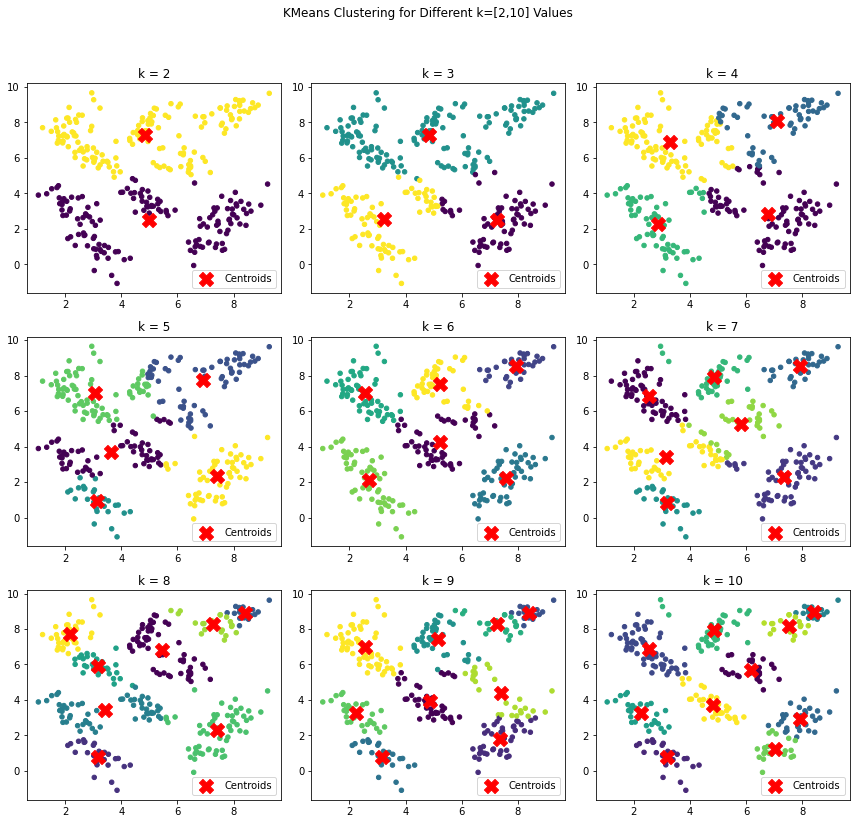

In [23]:
# output the clustering for k = [2,10]
# Create 3x3 subplots
import matplotlib.pyplot as plt 
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
fig.suptitle('KMeans Clustering for Different k=[2,10] Values')

# Flatten the 3x3 array of subplots for easy indexing
axes = axes.flatten()
k_values = range(2, 11)

for i, k in enumerate(k_values):
    # labels for the data 
    label = labels[k]
    centroids = final_centroids[k]

    # Plot the clusters
    axes[i].scatter(data[:, 0], data[:, 1], c=label, cmap='viridis', s=20)
    axes[i].scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    
    axes[i].set_title(f'k = {k}')
    axes[i].legend()

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()